In [12]:
# Package Imports - feel free to add what you think might be useful! 
%pip install numpy
%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Task 1: Playing with Pseudo-Randomness

### Part A: Implement and Benchmark an LCG

In [10]:
def Linear_Congruential_Generator(seed, multiplier, increment, modulus, iterations):
    sequence = [seed] 

    for i in range(iterations):
        sequence.append((sequence[-1] * multiplier + increment) % modulus)
    return sequence 

In [11]:
# TODO: ensure at least one parameter set satisfies the Hull-Dobell Theorem and demonstrates a full-period LCG
import math

def check_parameters(multiplier, increment, modulus):

    # gcd(c,m) = 1
    condition1 = math.gcd(increment, modulus) == 1

    # a - 1 is divisible by all prime factors of m
    factors = set()
    n = modulus
    while n % 2 == 0:
        factors.add(2)
        n //= 2
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        while n % i == 0:
            factors.add(i)
            n //= i
    if n > 2:
        factors.add(n)
    condition2 = all((multiplier - 1) % f == 0 for f in factors)

    #if m is divisible by 4, then a - 1 must also be divisible by 4
    condition3 = True
    if modulus % 4 == 0:
        condition3 = (multiplier - 1) % 4 == 0
    
    return condition1 and condition2 and condition3

In [12]:
multiplier = 1664525
increment = 1
modulus = 64

print(check_parameters(multiplier, increment, modulus))

True


In [13]:
sequence = Linear_Congruential_Generator(12345, multiplier, increment, modulus, 10_000_000)

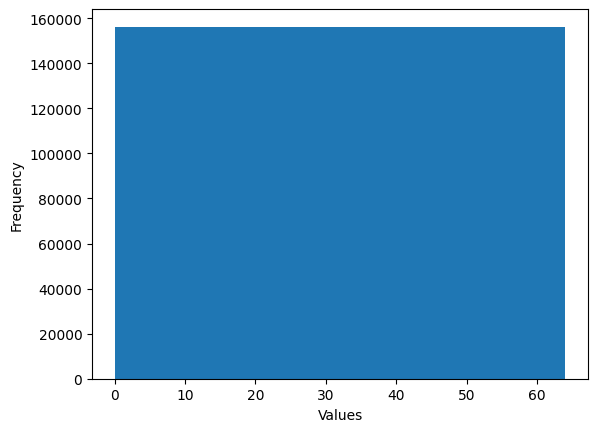

In [22]:
plt.hist(sequence, bins=modulus, range=(0, modulus))

plt.xlabel("Values")
plt.ylabel("Frequency")

plt.show()

In [8]:
def compute_entropy(X: dict):
    """ 
    You can pass in the random variable X in whatever form you choose.
    One way to represent a random variable is as a dictionary, 
    where each (key, value) pair represents an outcome x 
    and its probability P(X = x)

    Hint: NumPy might be helpful here!
    """

    # Shannon Entropy

    prob = np.array(X.values())
    log_prob = np.log(prob)

    return -(prob * log_prob).sum()

In [9]:
""" 
1. fix a short seed value for each LCG 
(no more than 2^10 possible values for the seed)

2. Over a long LCG sequence (at least 10^6 samples),
as the generator produces values, treat the sequence of outputs 
up to each step as a growing empirical distribution.

3. At regular intervals (e.g., every 1000 iterations), 
compute the Shannon Entropy or Min-Entropy 
of the current sample distribution.

Hint: We've already imported matplotlib for you, 
though any plotting package will do the trick.
"""
pass # TODO: Plot how the Shannon Entropy or Min-Entropy evolves with the number of iterations for each LCG configuration.

### Part B: Implement and Benchmark AES-Based PRNGs

In [13]:
# Here is a reference implementation of the AES algorithm: https://github.com/burakozpoyraz/Advanced-Encryption-Standard/tree/master
# ADVANCED ENCRYPTION STANDARD (AES) - 128 / Rijndael Cipher Algorithm

from copy import deepcopy

# ENCRYPTION ALGORITHM                 
# SubBytes //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
#           00   01   02   03   04   05   06   07   08   09   0a   0b   0c   0d   0e   0f
s_box = [[0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76], #00
         [0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0], #10
         [0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15], #20
         [0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75], #30
         [0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84], #40
         [0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf], #50
         [0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8], #60
         [0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2], #70
         [0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73], #80
         [0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb], #90
         [0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79], #a0
         [0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08], #b0
         [0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a], #c0
         [0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e], #d0
         [0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf], #e0
         [0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16]] #f0

def SubBytesTransformation(state_matrix):
   new_state_matrix = deepcopy(state_matrix)

   row_dim = len(new_state_matrix)
   col_dim = len(new_state_matrix[0])

   for row in range(0,row_dim):
      for col in range(0,col_dim):
         num_str = new_state_matrix[row][col]
         s_row = num_str[2]
         s_col = num_str[3]

         if s_row == 'a':
            s_row = 10
         elif s_row == 'b':
            s_row = 11
         elif s_row == 'c':
            s_row = 12
         elif s_row == 'd':
            s_row = 13
         elif s_row == 'e':
            s_row = 14
         elif s_row == 'f':
            s_row = 15
         else:
            s_row = int(s_row)

         if s_col == 'a':
            s_col = 10
         elif s_col == 'b':
            s_col = 11
         elif s_col == 'c':
            s_col = 12
         elif s_col == 'd':
            s_col = 13
         elif s_col == 'e':
            s_col = 14
         elif s_col == 'f':
            s_col = 15
         else:
            s_col = int(s_col)

         new_state_matrix[row][col] = "0x{:02x}".format(s_box[s_row][s_col])

   return new_state_matrix
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# ShiftRows /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
def ShiftArray(array, n, direction):
   len_array = len(array)
   shifted_array = []
   for index in range(0, len_array):
      shifted_array.append("0")

   if direction == 'left':
      for i in range(0, len_array):
         new_index = (i - n + n * len(array)) % len(array)
         shifted_array[new_index] = array[i]
   elif direction == 'right':
      for i in range(0, len_array):
         new_index = (i + n) % len(array)
         shifted_array[new_index] = array[i]
   return shifted_array

def ShiftRows(matrix):
   new_matrix = deepcopy(matrix)
   for row in range(1, 4):
      new_matrix[row] = ShiftArray(new_matrix[row], row, 'left')
   return new_matrix
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# MixColumns ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
mix_column_matrix = [[0x02,0x03,0x01,0x01],
                     [0x01,0x02,0x03,0x01],
                     [0x01,0x01,0x02,0x03],
                     [0x03,0x01,0x01,0x02]]

def GaloisMultiplication(number, multiplier):
   number_bin = format(number, '08b')
   if multiplier == 0x01:
      return number
   elif multiplier == 0x02:
      mask = 2 ** 8 - 1
      num_shifted = (number << 1) & mask
      if number_bin[0] == '0':
         return num_shifted
      else:
         return (num_shifted ^ 0b00011011)
   elif multiplier == 0x03:
      return (GaloisMultiplication(number, 0x02) ^ number)
   elif multiplier == 0x09:
      a = number
      for i in range(0, 3):
         a = GaloisMultiplication(a, 0x02)
      return (a ^ number)
   elif multiplier == 0x0b:
      a = number
      for i in range(0, 2):
         a = GaloisMultiplication(a, 0x02)
      a = a ^ number
      a = GaloisMultiplication(a, 0x02)
      return (a ^ number)
   elif multiplier == 0x0d:
      a = number
      a = GaloisMultiplication(a, 0x02)
      a = a ^ number
      for i in range(0, 2):
         a = GaloisMultiplication(a, 0x02)
      return (a ^ number)
   elif multiplier == 0x0e:
      a = number
      for i in range(0, 2):
         a = GaloisMultiplication(a, 0x02)
         a = a ^ number
      return (GaloisMultiplication(a, 0x02))

def MixColumns(matrix):
   new_matrix = deepcopy(matrix)
   for c in range(0, 4):
      new_column = [0,0,0,0]
      column = [new_matrix[0][c],new_matrix[1][c],new_matrix[2][c],new_matrix[3][c]]
      for row in range(0, 4):
         for col in range(0, 4):
            new_column[row] ^= GaloisMultiplication(int(column[col], 16), mix_column_matrix[row][col])
      for r in range(0, 4):
         new_matrix[r][c] = "0x{:02x}".format(new_column[r])
   return new_matrix
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# AddRoundKey ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////
def AddRoundKey(matrix, round_key):
   new_matrix = deepcopy(matrix)
   for row in range(0, 4):
      for col in range(0, 4):
         new_matrix[row][col] = "0x{:02x}".format(int(new_matrix[row][col], 16) ^ int(round_key[row][col], 16))
   return new_matrix
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Key Schedule //////////////////////////////////////////////////////////////////////////////////////////////////////////////////
rcon =[[0x01,0x02,0x04,0x08,0x10,0x20,0x40,0x80,0x1b,0x36],
       [0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00],
       [0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00],
       [0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00]]

def CreateWord(round_key, round_index, word_index):
   rcon_column = [0,0,0,0]
   word = [0,0,0,0]

   if word_index == 1:
      round_key_first_word = [0,0,0,0]
      round_key_last_word = [0,0,0,0]

      for row in range(0, 4):
         round_key_first_word[row] = round_key[row][0]
         round_key_last_word[row] = round_key[row][3]
         rcon_column[row] = rcon[row][round_index - 1]

      rot_word =  [ShiftArray(round_key_last_word, 1, 'left')]
      s_rot_word = SubBytesTransformation(rot_word)

      for row in range(0, 4):
         word[row] = "0x{:02x}".format(int(round_key_first_word[row], 16) ^ int(s_rot_word[0][row], 16) ^ rcon_column[row])
   else:
      previous_word = CreateWord(round_key, round_index, (word_index - 1))
      round_key_word = [0,0,0,0]

      for row in range(0, 4):
         previous_word[row] = int(previous_word[row], 16)
         round_key_word[row] = int(round_key[row][word_index - 1], 16)
         word[row] = "0x{:02x}".format(previous_word[row] ^ round_key_word[row])
   return word

def GenerateRoundKey(round_key, round_index):
   new_round_key = [[0,0,0,0],
                    [0,0,0,0],
                    [0,0,0,0],
                    [0,0,0,0]]
   
   for col in range(0, 4):
      word = CreateWord(round_key, round_index, (col + 1))
      for row in range(0, 4):
         new_round_key[row][col] = word[row]
   return new_round_key
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Encryption ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
def AES_Encrypt(state_matrix, cipher_key):
   new_state_matrix = deepcopy(state_matrix)
   round_key = deepcopy(cipher_key)

   new_state_matrix = AddRoundKey(new_state_matrix, round_key)

   for i in range(1, 10):
      new_state_matrix = SubBytesTransformation(new_state_matrix)
      new_state_matrix = ShiftRows(new_state_matrix)
      new_state_matrix = MixColumns(new_state_matrix)
      round_key = GenerateRoundKey(round_key, i)
      new_state_matrix = AddRoundKey(new_state_matrix, round_key)

   new_state_matrix = SubBytesTransformation(new_state_matrix)
   new_state_matrix = ShiftRows(new_state_matrix)
   round_key = GenerateRoundKey(round_key, 10)
   new_state_matrix = AddRoundKey(new_state_matrix, round_key)

   return new_state_matrix
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Message Encryption ////////////////////////////////////////////////////////////////////////////////////////////////////////////
def EncryptMessage(message, cipher_key):
   encrypted_message = ""

   message_ascii = []
   for c in message:
      message_ascii.append(ord(c))

   buffer_matrix = [[0,0,0,0],
                    [0,0,0,0],
                    [0,0,0,0],
                    [0,0,0,0]]
   iter_num = int(len(message_ascii) / 16)
   for iter_index in range(0, iter_num):
      for element_index in range(0, 16):
         buffer_matrix[int(element_index / 4)][element_index % 4] = message_ascii.pop(0)
         buffer_matrix_string = deepcopy(buffer_matrix)
         for row in range(0, 4):
            for col in range(0, 4):
               buffer_matrix_string[row][col] = "0x{:02x}".format(buffer_matrix_string[row][col])

      encrypted_buffer_matrix = AES_Encrypt(buffer_matrix_string, cipher_key)

      for row in range(0, 4):
         for col in range(0, 4):
            dec_value = int(encrypted_buffer_matrix[row][col], 16)
            encrypted_message += chr((dec_value % 94) + 33)
            encrypted_message += str(int(dec_value / 94))

   if len(message_ascii) > 0:
      for element_index in range(0, 16):
         if len(message_ascii) > 0:
            buffer_matrix[int(element_index / 4)][element_index % 4] = message_ascii.pop(0)
         else:
            buffer_matrix[int(element_index / 4)][element_index % 4] = 0
            buffer_matrix_string = deepcopy(buffer_matrix)
            for row in range(0, 4):
               for col in range(0, 4):
                  buffer_matrix_string[row][col] = "0x{:02x}".format(buffer_matrix_string[row][col])
                  
      encrypted_buffer_matrix = AES_Encrypt(buffer_matrix_string, cipher_key)

      for row in range(0, 4):
         for col in range(0, 4):
            dec_value = int(encrypted_buffer_matrix[row][col], 16)
            encrypted_message += chr((dec_value % 94) + 33)
            encrypted_message += str(int(dec_value / 94))
   return encrypted_message
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# DECRYPTION ALGORITHM
# Inverse SubBytes //////////////////////////////////////////////////////////////////////////////////////////////////////////////
#              00   01   02   03   04   05   06   07   08   09   0a   0b   0c   0d   0e   0f
inv_s_box = [[0x52,0x09,0x6a,0xd5,0x30,0x36,0xa5,0x38,0xbf,0x40,0xa3,0x9e,0x81,0xf3,0xd7,0xfb], #00
             [0x7c,0xe3,0x39,0x82,0x9b,0x2f,0xff,0x87,0x34,0x8e,0x43,0x44,0xc4,0xde,0xe9,0xcb], #10
             [0x54,0x7b,0x94,0x32,0xa6,0xc2,0x23,0x3d,0xee,0x4c,0x95,0x0b,0x42,0xfa,0xc3,0x4e], #20
             [0x08,0x2e,0xa1,0x66,0x28,0xd9,0x24,0xb2,0x76,0x5b,0xa2,0x49,0x6d,0x8b,0xd1,0x25], #30
             [0x72,0xf8,0xf6,0x64,0x86,0x68,0x98,0x16,0xd4,0xa4,0x5c,0xcc,0x5d,0x65,0xb6,0x92], #40
             [0x6c,0x70,0x48,0x50,0xfd,0xed,0xb9,0xda,0x5e,0x15,0x46,0x57,0xa7,0x8d,0x9d,0x84], #50
             [0x90,0xd8,0xab,0x00,0x8c,0xbc,0xd3,0x0a,0xf7,0xe4,0x58,0x05,0xb8,0xb3,0x45,0x06], #60
             [0xd0,0x2c,0x1e,0x8f,0xca,0x3f,0x0f,0x02,0xc1,0xaf,0xbd,0x03,0x01,0x13,0x8a,0x6b], #70
             [0x3a,0x91,0x11,0x41,0x4f,0x67,0xdc,0xea,0x97,0xf2,0xcf,0xce,0xf0,0xb4,0xe6,0x73], #80
             [0x96,0xac,0x74,0x22,0xe7,0xad,0x35,0x85,0xe2,0xf9,0x37,0xe8,0x1c,0x75,0xdf,0x6e], #90
             [0x47,0xf1,0x1a,0x71,0x1d,0x29,0xc5,0x89,0x6f,0xb7,0x62,0x0e,0xaa,0x18,0xbe,0x1b], #a0
             [0xfc,0x56,0x3e,0x4b,0xc6,0xd2,0x79,0x20,0x9a,0xdb,0xc0,0xfe,0x78,0xcd,0x5a,0xf4], #b0
             [0x1f,0xdd,0xa8,0x33,0x88,0x07,0xc7,0x31,0xb1,0x12,0x10,0x59,0x27,0x80,0xec,0x5f], #c0
             [0x60,0x51,0x7f,0xa9,0x19,0xb5,0x4a,0x0d,0x2d,0xe5,0x7a,0x9f,0x93,0xc9,0x9c,0xef], #d0
             [0xa0,0xe0,0x3b,0x4d,0xae,0x2a,0xf5,0xb0,0xc8,0xeb,0xbb,0x3c,0x83,0x53,0x99,0x61], #e0
             [0x17,0x2b,0x04,0x7e,0xba,0x77,0xd6,0x26,0xe1,0x69,0x14,0x63,0x55,0x21,0x0c,0x7d]] #f0

def InvSubBytesTransformation(state_matrix):
   new_state_matrix = deepcopy(state_matrix)

   row_dim = len(new_state_matrix)
   col_dim = len(new_state_matrix[0])

   for row in range(0,row_dim):
      for col in range(0,col_dim):
         num_str = new_state_matrix[row][col]
         s_row = num_str[2]
         s_col = num_str[3]

         if s_row == 'a':
            s_row = 10
         elif s_row == 'b':
            s_row = 11
         elif s_row == 'c':
            s_row = 12
         elif s_row == 'd':
            s_row = 13
         elif s_row == 'e':
            s_row = 14
         elif s_row == 'f':
            s_row = 15
         else:
            s_row = int(s_row)

         if s_col == 'a':
            s_col = 10
         elif s_col == 'b':
            s_col = 11
         elif s_col == 'c':
            s_col = 12
         elif s_col == 'd':
            s_col = 13
         elif s_col == 'e':
            s_col = 14
         elif s_col == 'f':
            s_col = 15
         else:
            s_col = int(s_col)

         new_state_matrix[row][col] = "0x{:02x}".format(inv_s_box[s_row][s_col])

   return new_state_matrix            
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Inverse ShiftRows /////////////////////////////////////////////////////////////////////////////////////////////////////////////
def InvShiftRows(matrix):
   new_matrix = deepcopy(matrix)
   for row in range(1, 4):
      new_matrix[row] = ShiftArray(new_matrix[row], row, 'right')
   return new_matrix
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Inverse MixColumns ////////////////////////////////////////////////////////////////////////////////////////////////////////////
inv_mix_column_matrix = [[0x0e,0x0b,0x0d,0x09],
                         [0x09,0x0e,0x0b,0x0d],
                         [0x0d,0x09,0x0e,0x0b],
                         [0x0b,0x0d,0x09,0x0e]]

def InvMixColumns(matrix):
   new_matrix = deepcopy(matrix)
   for c in range(0, 4):
      new_column = [0,0,0,0]
      column = [new_matrix[0][c],new_matrix[1][c],new_matrix[2][c],new_matrix[3][c]]
      for row in range(0, 4):
         for col in range(0, 4):
            new_column[row] ^= GaloisMultiplication(int(column[col], 16), inv_mix_column_matrix[row][col])
      for r in range(0, 4):
         new_matrix[r][c] = "0x{:02x}".format(new_column[r])
   return new_matrix
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Decryption ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
def AES_Decrypt(state_matrix, cipher_key):
   new_state_matrix = deepcopy(state_matrix)
   round_key = deepcopy(cipher_key)

   round_keys_box = {}

   for round_index in range(0, 11):
      if round_index != 0:
         round_key = GenerateRoundKey(round_key, round_index)
      for row in range(0, 4):
         for col in range(0, 4):
            round_keys_box[round_index, row, col] = round_key[row][col]
   
   new_state_matrix = AddRoundKey(new_state_matrix, round_key)
   new_state_matrix = InvShiftRows(new_state_matrix)
   new_state_matrix = InvSubBytesTransformation(new_state_matrix)

   for round_index in range(1, 10):
      for row in range(0, 4):
         for col in range(0, 4):
            round_key[row][col] = round_keys_box[(10 - round_index), row, col]

      new_state_matrix = AddRoundKey(new_state_matrix, round_key)
      new_state_matrix = InvMixColumns(new_state_matrix)
      new_state_matrix = InvShiftRows(new_state_matrix)
      new_state_matrix = InvSubBytesTransformation(new_state_matrix)

   for row in range(0, 4):
      for col in range(0, 4):
         round_key[row][col] = round_keys_box[0, row, col]
   new_state_matrix = AddRoundKey(new_state_matrix, round_key)
   return new_state_matrix
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Message Decryption ////////////////////////////////////////////////////////////////////////////////////////////////////////////
def DecryptMessage(encrypted_message, cipher_key):
   decrypted_message = ""

   buffer_matrix = [[0,0,0,0],
                    [0,0,0,0],
                    [0,0,0,0],
                    [0,0,0,0]]
   encrypted_message_dec = []
   encrypted_message_length = len(encrypted_message)
   for char_index in range(0, encrypted_message_length, 2):
      encrypted_char = encrypted_message[char_index]
      encryption_info = encrypted_message[char_index + 1]

      dec_value = (ord(encrypted_char) - 33) + (int(encryption_info) * 94)
      encrypted_message_dec.append(dec_value)

   iter_num = int(len(encrypted_message_dec) / 16)
   for iter_index in range(0, iter_num):
      for element_index in range(0, 16):
         buffer_matrix[int(element_index / 4)][element_index % 4] = encrypted_message_dec.pop(0)
         buffer_matrix_string = deepcopy(buffer_matrix)
         for row in range(0, 4):
            for col in range(0, 4):
               buffer_matrix_string[row][col] = "0x{:02x}".format(buffer_matrix_string[row][col])

      decrypted_buffer_matrix = AES_Decrypt(buffer_matrix_string, cipher_key)

      for row in range(0, 4):
         for col in range(0, 4):
            decrypted_dec_value = int(decrypted_buffer_matrix[row][col], 16)
            if decrypted_dec_value != 0:
               decrypted_message += chr(decrypted_dec_value)
   return decrypted_message
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# MAIN ALGORITHM /////////////////////////////////////////////////////////////////////////////////////////////////////////////////
cipher_key = [["0x2b","0x28","0xab","0x09"],
              ["0x7e","0xae","0xf7","0xcf"],
              ["0x15","0xd2","0x15","0x4f"],
              ["0x16","0xa6","0x88","0x3c"]]

message = "Burak. | Stay With Tech :)"
print("Message: " + message)
print("")

encrypted_message = EncryptMessage(message, cipher_key)
print("Encrypted Message: " + encrypted_message)
print("")

decrypted_message = DecryptMessage(encrypted_message, cipher_key)
print("Decrypted Message: " + decrypted_message)
print("")
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Message: Burak. | Stay With Tech :)

Encrypted Message: 60"1E180B1&0&1:241&2:2"2H0l0R2[0:140=110K251G1(1]0[192P1j0Y141>0

Decrypted Message: Burak. | Stay With Tech :)



In [83]:
# TODO: helper function to pad/truncate the seed to 16 bytes (128 bits)
def pad_seed(seed_bytes, target_len=16):
    return seed_bytes * (target_len // len(seed_bytes))

# TODO: implement a simple AES-based PRNG using ECB mode
def AES_PRNG(seed, num_bytes):
    sequence = []
    padded_seed = pad_seed(seed, 16)
    key = [[0 for _ in range(4)] for _ in range(4)]
    for i in range(4):
        for j in range(4):
            key[i][j] = hex(padded_seed[i * 4 + j])

    block = "padded_seedccccc"
    while len(sequence) < num_bytes:
        print(len(block))
        block = EncryptMessage(block, key)
        print(len(block))
        sequence.append(block)
    return sequence

In [68]:
# TODO: choose at least 3 different seed lengths (e.g., 8, 16, 64 bits)
seed_lengths = [1, 2, 8]  # in bytes

# TODO: generate sequences of increasing length (10^5 to 10^7) for each seed length
sequence_lengths = [10**5, 10**6, 10**7]

In [84]:
# Example: Generate and store sequences
all_sequences = {}

for seed_len in seed_lengths:
    seed = np.random.bytes(seed_len)
    all_sequences[seed_len] = {}

    for seq_len in sequence_lengths:
        prng_output = AES_PRNG(seed, seq_len)
        all_sequences[seed_len][seq_len] = prng_output

16
32
32
64
64
128
128
256
256
512
512
1024
1024
2048
2048
4096
4096
8192
8192
16384
16384
32768
32768


KeyboardInterrupt: 

In [14]:
# TODO: plot entropy across chunks of the output to study randomness
def plot_entropy(sequence, window_size=1000):
    pass  # TODO: split sequence into chunks and calculate Shannon entropy

In [15]:
# TODO: plot autocorrelation vs lag
def plot_autocorrelation(sequence, max_lag=100):
    pass  # TODO: compute autocorrelation for various lag values

In [16]:
# TODO: apply statistical tests (e.g., Chi-squared) to compare with uniform distribution
def run_statistical_tests(sequence):
    pass  # TODO: run and print p-values for randomness tests

### (BONUS) Part C: Breaking the Illusion of Randomness

### Bonus Task:
Train a light-weight model (small-neural net or decision tree) to predict the next number in your random number sequences generated from LCG and AES. Now try implementing at least one other more robust PRNGs from the list below:
- XOR-Shift Generator
- Permuted Congruential Generator (PCG) 
- SplitMix64 

In [17]:
# You may want to import these packages, though feel free to import anything else you need
import torch 
import torch.nn as nn 
import torch.nn.functional as F 

import tensorflow as tf 
import keras 

import sklearn

ModuleNotFoundError: No module named 'torch'